In [1]:
import sys
sys.path.insert(0, '../functions/')

In [2]:
from skimage.filters import threshold_otsu
from cluster import Cluster
import tiffIO as tIO
import mouseVis as mv
import plosLib as pLib
import connectLib as cLib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import cPickle as pickle

In [3]:
#load the data
data0 = tIO.unzipChannels(tIO.loadTiff('../../data/SEP-GluA1-KI_tp1.tif'))[0][5:10]

In [4]:
#generate a foreground probability map for the data
probVox = pLib.pipeline(data0)

In [5]:
#get the otsu binarization of the supervoxel
bianVox = cLib.otsuVox(probVox)

In [6]:
#extract the clusters from the binary voxel
clusters = cLib.connectedComponents(bianVox)

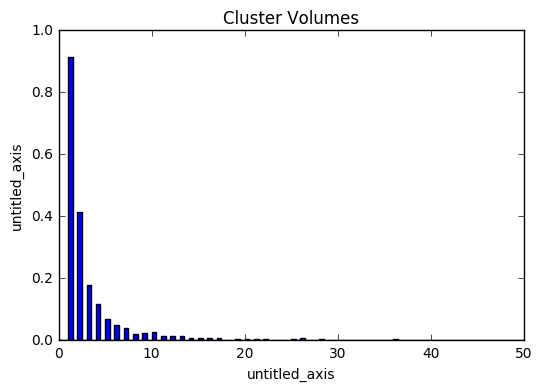

In [7]:
#generate a histogram to show distribution of cluster volumes
clusterVols = []
for i in range(len(clusters)):
    clusterVols.append(clusters[i].getVolume())
mv.generateHist(clusterVols, title = 'Cluster Volumes', bins = 100, axisStart = 0, axisEnd = 50)